In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
null_per = df.isnull().sum()*100/len(df)
null_per_data = pd.DataFrame({'column_name': df.columns,'percent_missing': null_per})

In [5]:
null_per_data

,column_name,percent_missing
Id,Id,0.000000
MSSubClass,MSSubClass,0.000000
MSZoning,MSZoning,0.000000
LotFrontage,LotFrontage,17.739726
LotArea,LotArea,0.000000
...,...,...
MoSold,MoSold,0.000000
YrSold,YrSold,0.000000
SaleType,SaleType,0.000000
SaleCondition,SaleCondition,0.000000


In [6]:
col_names = list()
perc = list()
for i in null_per_data.iloc[:,0]:
    col_names.append(i)
for i in null_per_data.iloc[:,1]:
    perc.append(i)

In [7]:
miss_col35 = list()
for i in range(0,81):
    if perc[i]>35:
        miss_col35.append(col_names[i])

In [8]:
miss_col35

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
df.drop(miss_col35, inplace = True, axis = 1)

In [10]:
null_per2 = df.isnull().sum()*100/len(df)
null_per_data2 = pd.DataFrame({'column_name': df.columns,'percent_missing': null_per2})

In [11]:
col_names2 = list()
perc2 = list()
for i in null_per_data2.iloc[:,0]:
    col_names2.append(i)
for i in null_per_data2.iloc[:,1]:
    perc2.append(i)

In [12]:
miss_col = list()
for i in range(0,76):
    if perc2[i]>0:
        miss_col.append(col_names2[i])

In [13]:
num_miss_cols = list()
ob_miss_cols = list()
for i in miss_col:
    if str(df[i].dtypes) != 'object':
        num_miss_cols.append(i)
    else:
        ob_miss_cols.append(i)

In [14]:
median_val = 0
for i in num_miss_cols:
    median_val = df[i].median()
    df[i] = df[i].replace(np.nan,median_val)

In [15]:
mode_val = 0
for i in ob_miss_cols:
    mode_val = (df[i].mode())[0]
    df[i] = df[i].replace(np.nan,mode_val)

In [16]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,4,4,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [17]:
mode_high = list()
for i in ob_miss_cols:
    if (df[i].value_counts().max()/1460) > 0.65:
        mode_high.append(i)

In [18]:
df.drop(mode_high, inplace = True, axis = 1)

In [19]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,4,4,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [20]:
num = []
for i in df.columns:
    if df[i].dtypes != 'object':
        num.append(i)

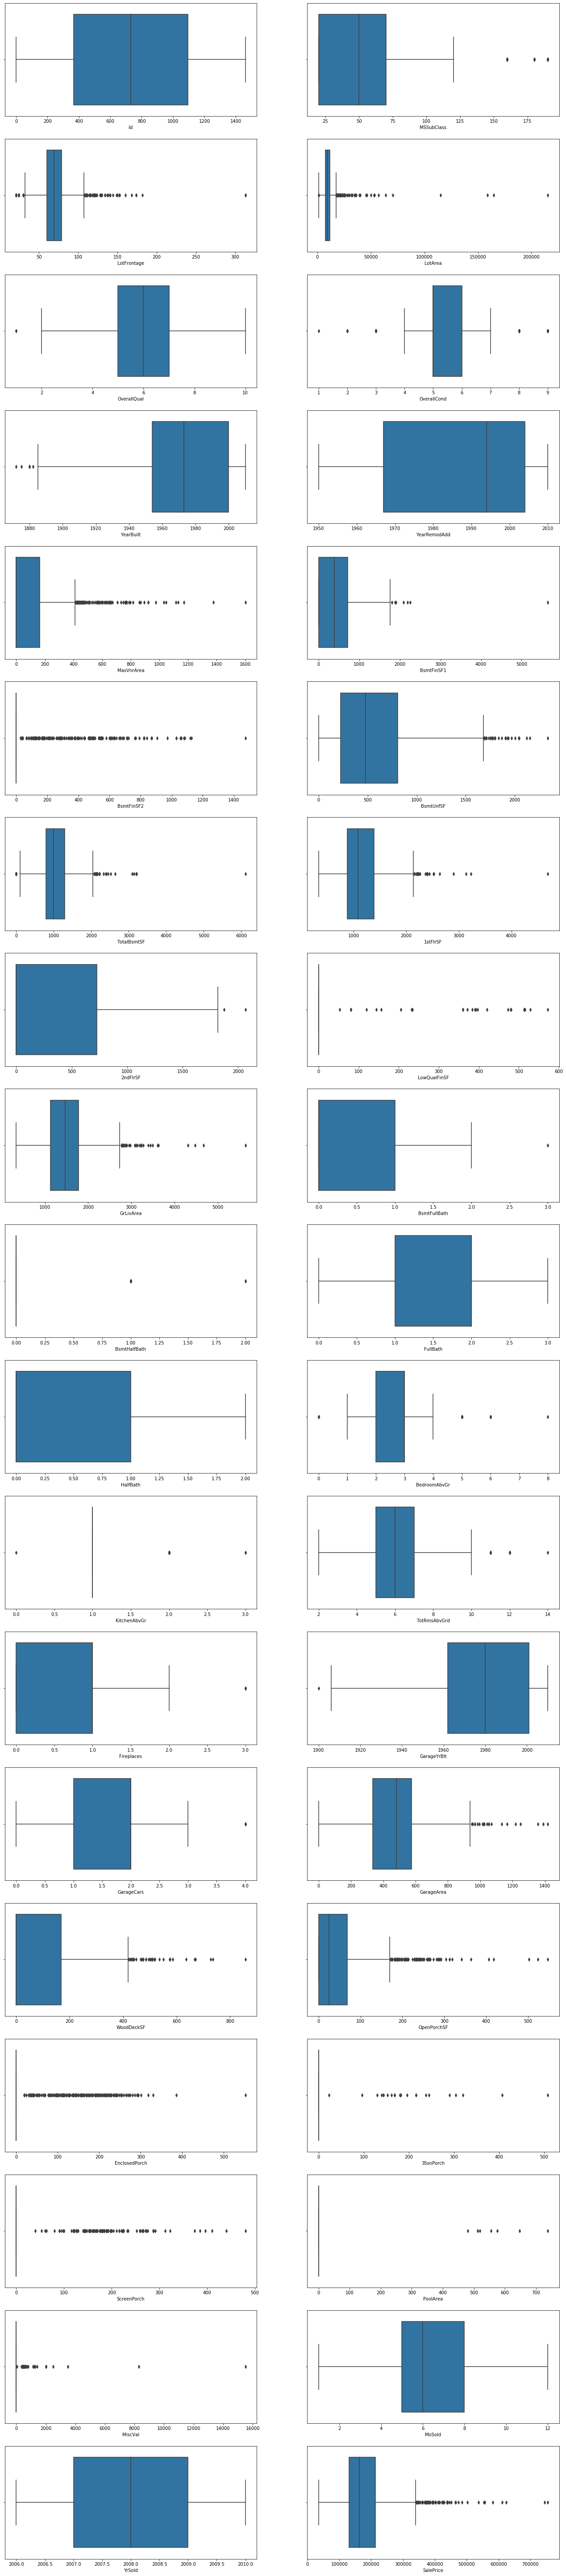

In [21]:
c = 1
plt.figure()
for i in num:
    plt.subplot(len(num)/2,2,c)
    sns.boxplot(df[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [22]:
drop_cols = ["LotArea","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

In [23]:
df.drop(drop_cols, inplace = True, axis = 1)

In [24]:
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,2,4,4,2,5,3,...,NaN,NaN,3,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,1454,925,1311,1459,1052,1382,...,NaN,NaN,1340,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,69.863699,NaN,NaN,NaN,NaN,NaN,NaN,...,1.767123,472.980137,NaN,94.244521,46.660274,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,22.027677,NaN,NaN,NaN,NaN,NaN,NaN,...,0.747315,213.804841,NaN,125.338794,66.256028,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,334.500000,NaN,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,480.000000,NaN,0.000000,25.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,576.000000,NaN,168.000000,68.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [25]:
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []

num = []
for i in df.columns:
    if df[i].dtypes != 'object':
        num.append(i)

for i in num:
    p25.append(df[i].quantile(q=0.25))
    p75.append(df[i].quantile(q=0.75))

for i in range(len(p75)):
    iqr.append(p75[i]-p25[i])
    
for i in range(len(p75)):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in num:
    df.loc[df[i]>iqrul[j],i] = df[i].quantile(q=0.985)
    df.loc[df[i]<iqrll[j],i] = df[i].quantile(q=0.015)
    j += 1

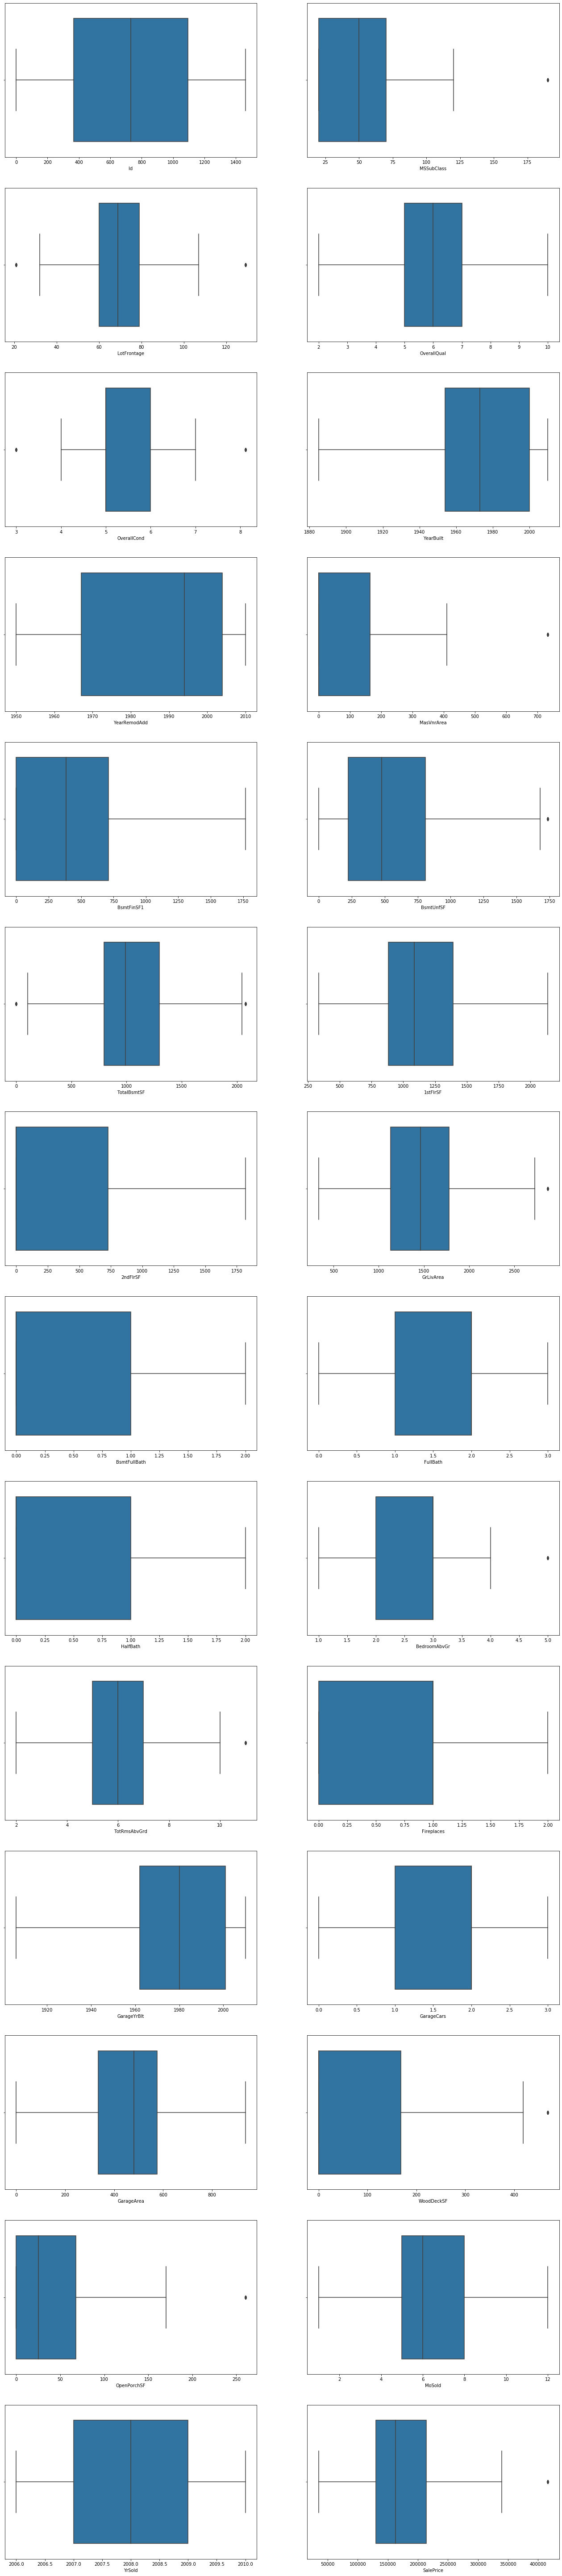

In [26]:
c = 1
plt.figure()
for i in num:
    plt.subplot(len(num)/2,2,c)
    sns.boxplot(df[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [27]:
cat = list()
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
print(cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


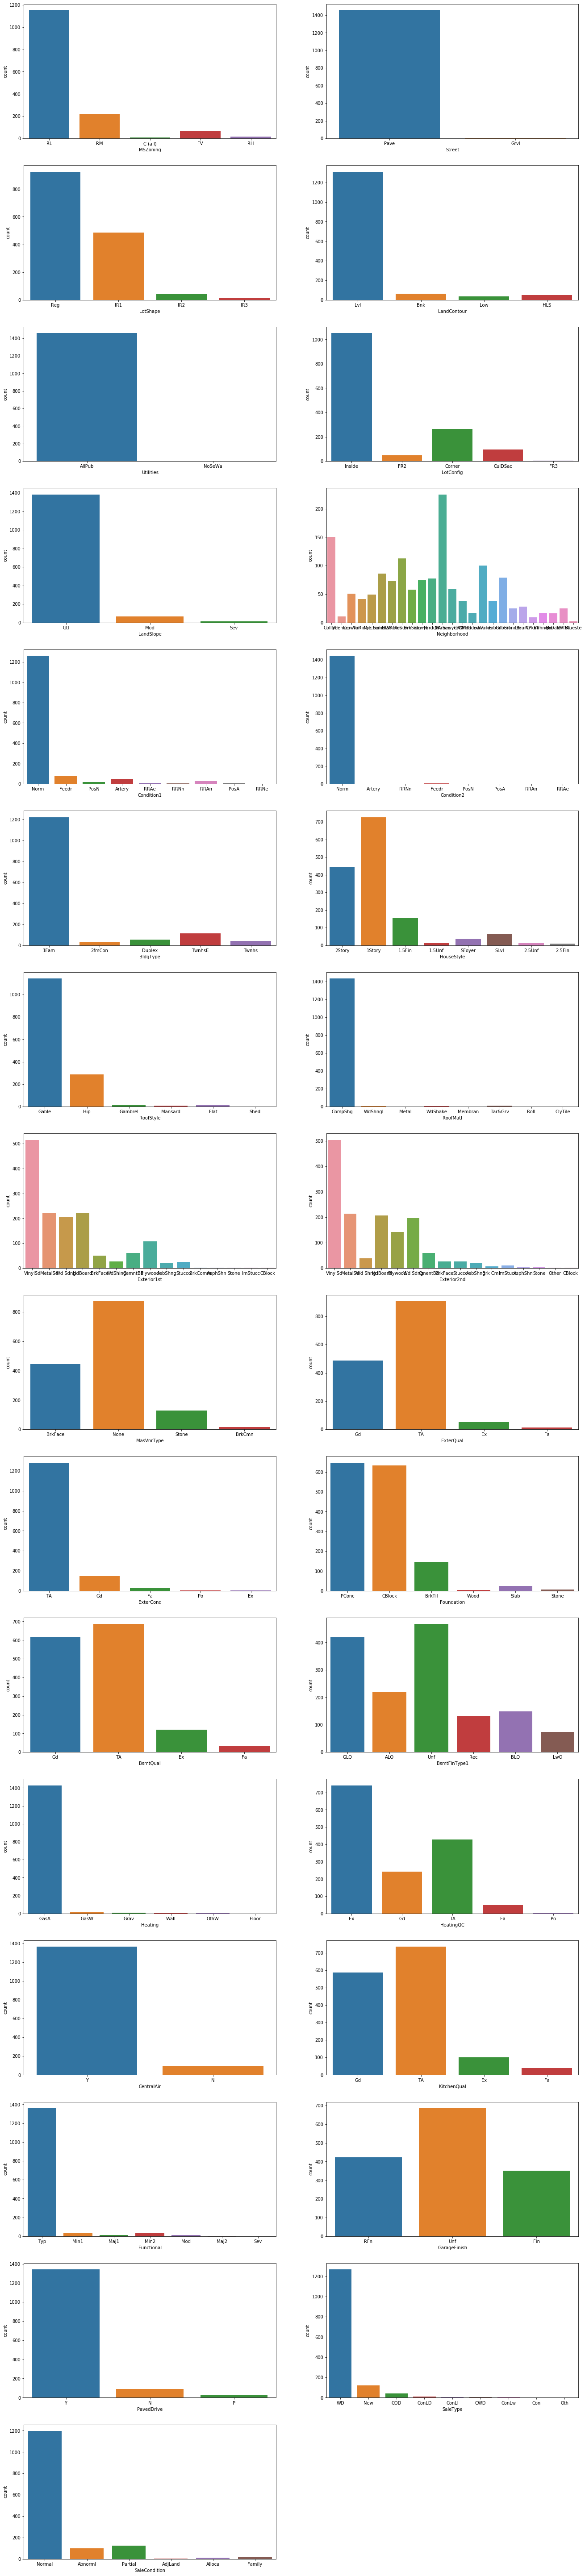

In [28]:
c = 1
plt.figure()
for i in cat:
    plt.subplot((len(cat)//2)+1,2,c)
    sns.countplot(x = i, data = df)
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [29]:
drops = ['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','Heating','Functional','PavedDrive']

In [30]:
df.drop(drops, inplace = True, axis = 1)

In [31]:
cat = list()
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)

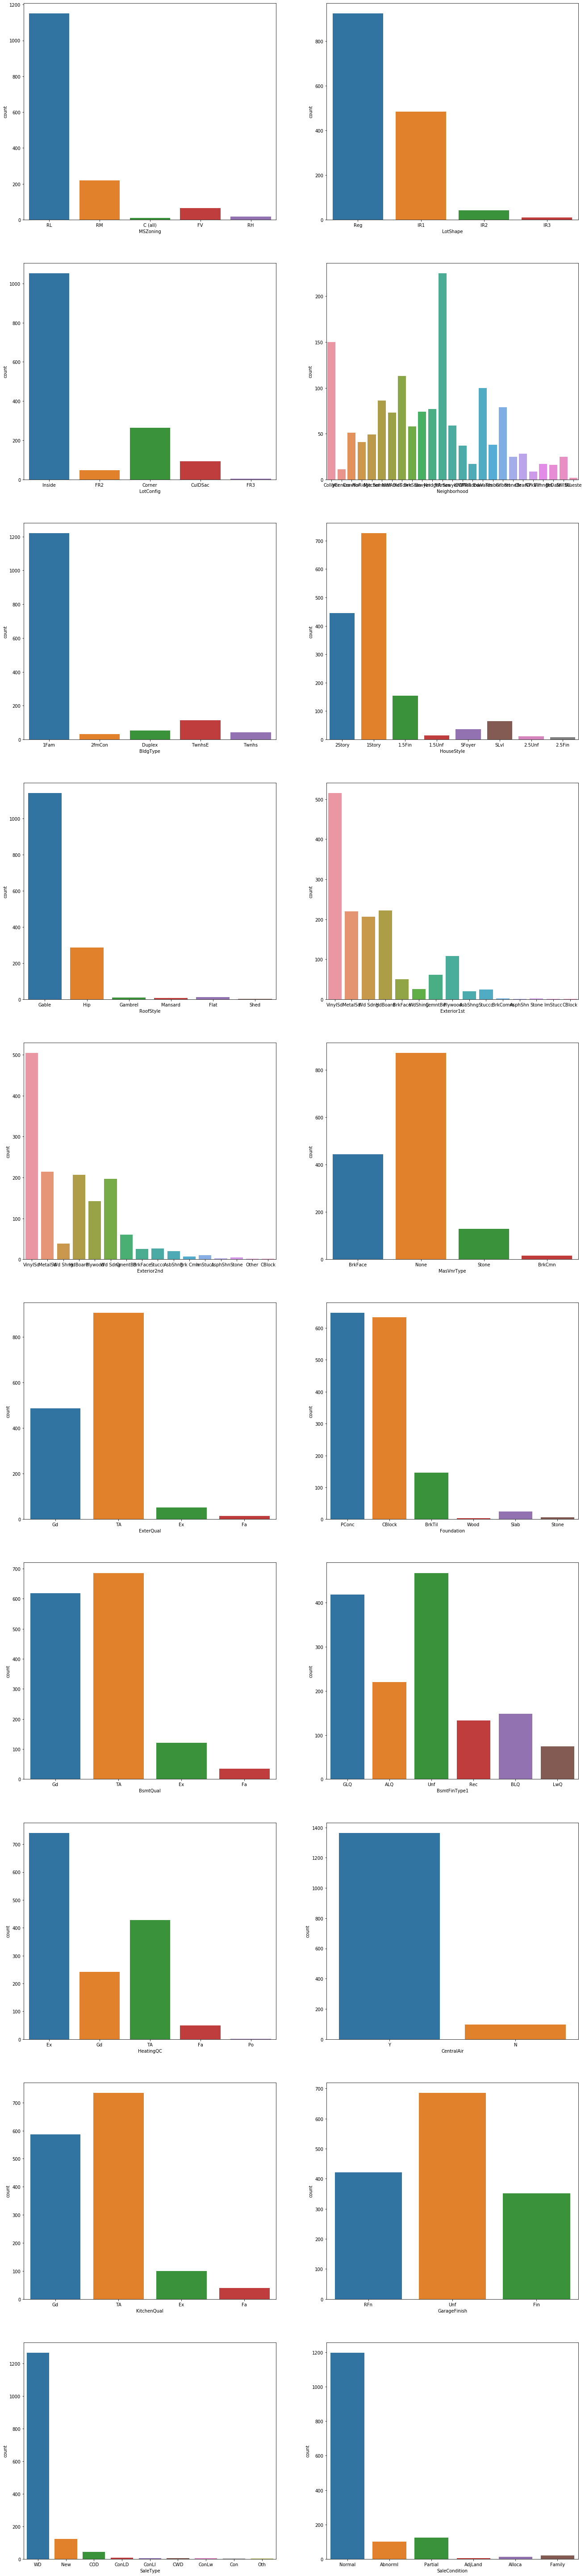

In [32]:
c = 1
plt.figure()
for i in cat:
    plt.subplot(len(cat)/2,2,c)
    sns.countplot(x = i, data = df)
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [33]:
j = 0
for i in df['MSZoning']:
    if i != 'RL' and i != 'RM':
        df['MSZoning'][j] = 'RM'
    j += 1

In [34]:
j = 0
for i in df['LotShape']:
    if i != 'Reg' and i != 'IR1':
        df['LotShape'][j] = 'IR1'
    j += 1

In [35]:
j = 0
for i in df['LotConfig']:
    if i != 'Inside' and i != 'Corner':
        df['LotConfig'][j] = 'Corner'
    j += 1

In [36]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [37]:
import random
l = ['NAmes','CollgCr','OldTown','Edwards','Somerst','Gilbert','NridgHt','Sawyer','NWAmes']
j = 0
for i in df['Neighborhood']:
    if i != 'NAmes' and i != 'CollgCr' and i != 'OldTown' and i != 'Edwards' and i != 'Somerst' and i != 'Gilbert' and i != 'NridgHt' and i != 'Sawyer' and i != 'NWAmes':
        df['Neighborhood'][j] = random.choice(l)
    j += 1

In [38]:
j = 0
for i in df['BldgType']:
    if i != '1Fam' and i != 'TwnhsE':
        df['BldgType'][j] = 'TwnhsE'
    j += 1

In [39]:
j = 0
for i in df['HouseStyle']:
    if i != '2Story' and i != '1Story' and i != '1.5Fin':
        df['HouseStyle'][j] = '1.5Fin'
    j += 1

In [40]:
j = 0
for i in df['RoofStyle']:
    if i != 'Gable' and i != 'Hip':
        df['RoofStyle'][j] = 'Hip'
    j += 1

In [41]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [42]:
import random
l = ['VinylSd','HdBoard','MetalSd','Wd Sdng','Plywood']
j = 0
for i in df['Exterior1st']:
    if i != 'VinylSd' and i != 'HdBoard' and i != 'MetalSd' and i != 'Wd Sdng' and i != 'Plywood':
        df['Exterior1st'][j] = random.choice(l)
    j += 1

In [43]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [44]:
import random
l = ['VinylSd','HdBoard','MetalSd','Wd Sdng','Plywood']
j = 0
for i in df['Exterior2nd']:
    if i != 'VinylSd' and i != 'HdBoard' and i != 'MetalSd' and i != 'Wd Sdng' and i != 'Plywood':
        df['Exterior2nd'][j] = random.choice(l)
    j += 1

In [45]:
j = 0
for i in df['MasVnrType']:
    if i != 'BrkFace' and i != 'None':
        df['MasVnrType'][j] = 'BrkFace'
    j += 1

In [46]:
j = 0
for i in df['ExterQual']:
    if i != 'Gd' and i != 'TA':
        df['ExterQual'][j] = 'Gd'
    j += 1

In [47]:
j = 0
for i in df['Foundation']:
    if i != 'PConc' and i != 'CBlock' and i != 'BrkTil':
        df['Foundation'][j] = 'BrkTil'
    j += 1

In [48]:
j = 0
for i in df['BsmtQual']:
    if i != 'Gd' and i != 'TA' and i != 'Ex':
        df['BsmtQual'][j] = 'Ex'
    j += 1

In [49]:
j = 0
for i in df['HeatingQC']:
    if i != 'Gd' and i != 'TA' and i != 'Ex':
        df['HeatingQC'][j] = 'Gd'
    j += 1

In [50]:
df.drop(['CentralAir'], inplace = True, axis = 1)

In [51]:
j = 0
for i in df['KitchenQual']:
    if i != 'Gd' and i != 'TA' and i != 'Ex':
        df['KitchenQual'][j] = 'Ex'
    j += 1

In [52]:
df.drop(['SaleType'], inplace = True, axis = 1)

In [53]:
j = 0
for i in df['SaleCondition']:
    if i != 'Normal' and i != 'Abnormal':
        df['SaleCondition'][j] = 'Abnormal'
    j += 1

In [54]:
cat = list()
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
print(cat)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'SaleCondition']


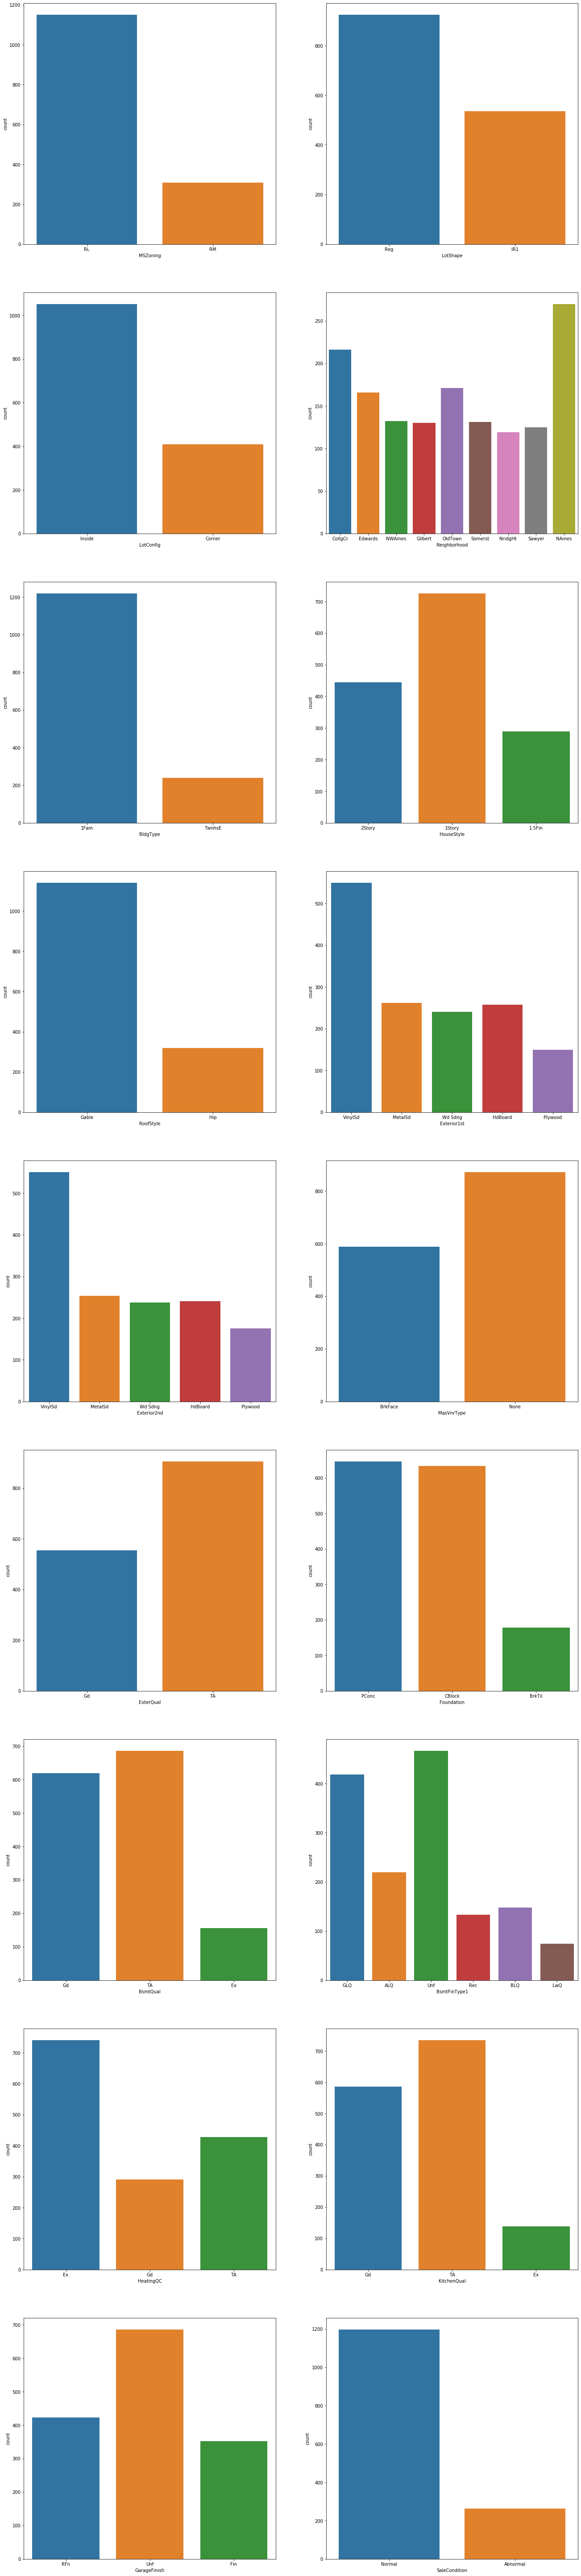

In [55]:
c = 1
plt.figure()
for i in cat:
    plt.subplot(len(cat)/2,2,c)
    sns.countplot(x = i, data = df)
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [56]:
corr = df.corr()

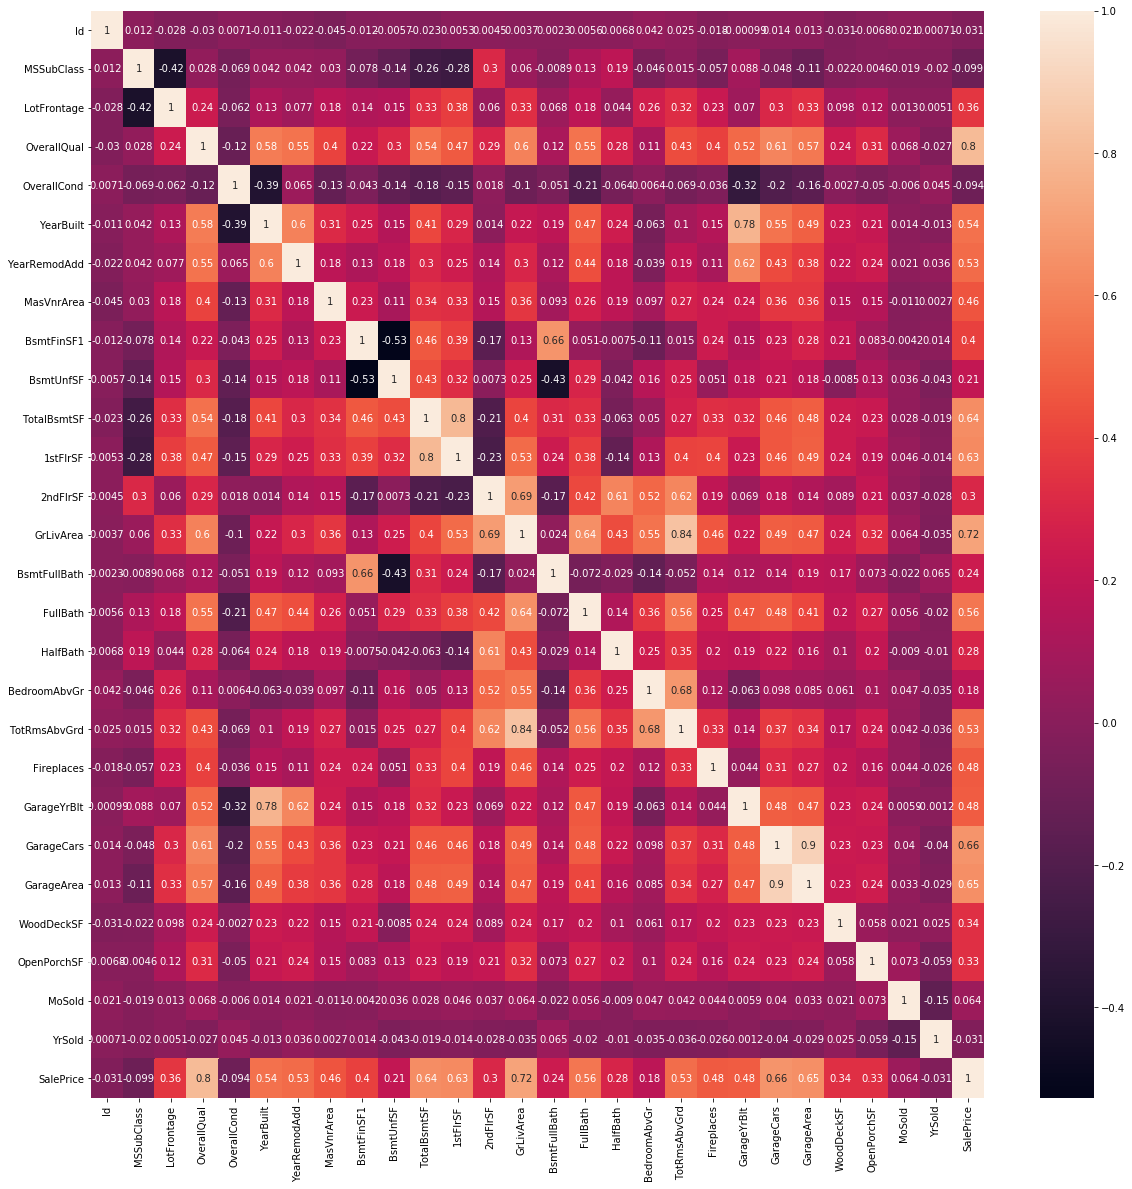

In [57]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True)

In [59]:
def z_score(df):
    df_std = df.copy()
    for column in num:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

df_normal = z_score(df)
df_normal

,Id,MSSubClass,MSZoning,LotFrontage,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,-1.730272,0.037865,RL,-0.227058,Reg,Inside,CollgCr,1Fam,2Story,0.653125,...,1.018343,RFn,0.319621,0.373669,-0.775002,0.206144,-1.598563,0.138730,Normal,0.367967
1,-1.727900,-0.832725,RL,0.513459,Reg,Corner,Edwards,1Fam,1Story,-0.074230,...,-0.108638,RFn,0.319621,-0.051385,1.711706,-0.715905,-0.488943,-0.614228,Normal,0.012977
2,-1.725528,0.037865,RL,-0.078955,IR1,Inside,CollgCr,1Fam,2Story,0.653125,...,0.934863,RFn,0.319621,0.663478,-0.775002,-0.081052,0.990552,0.138730,Normal,0.565183
3,-1.723156,0.255512,RL,-0.473897,IR1,Corner,NWAmes,1Fam,2Story,0.653125,...,0.809643,Unf,1.672219,0.827703,-0.775002,-0.186861,-1.598563,-1.367186,Abnormal,-0.532655
4,-1.720785,0.037865,RL,0.710930,IR1,Corner,Gilbert,1Fam,2Story,1.380481,...,0.893123,RFn,1.672219,1.764753,0.827173,0.553802,2.100173,0.138730,Normal,0.913599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.720785,0.037865,RL,-0.375162,Reg,Inside,Gilbert,1Fam,2Story,-0.074230,...,0.851383,RFn,0.319621,-0.051385,-0.775002,-0.111283,0.620678,-0.614228,Normal,-0.072483
1456,1.723156,-0.832725,RL,0.760298,Reg,Inside,NWAmes,1Fam,1Story,-0.074230,...,-0.025158,Unf,0.319621,0.141821,2.137284,-0.715905,-1.598563,1.644646,Normal,0.387688
1457,1.725528,0.255512,RL,-0.177690,Reg,Inside,Edwards,1Fam,2Story,0.653125,...,-1.569540,RFn,-1.032977,-1.056057,-0.775002,0.191029,-0.488943,1.644646,Normal,1.130537
1458,1.727900,-0.832725,RL,-0.078955,Reg,Inside,NAmes,1Fam,1Story,-0.801586,...,-1.193880,Unf,-1.032977,-1.114019,2.279143,-0.715905,-0.858816,1.644646,Normal,-0.504716


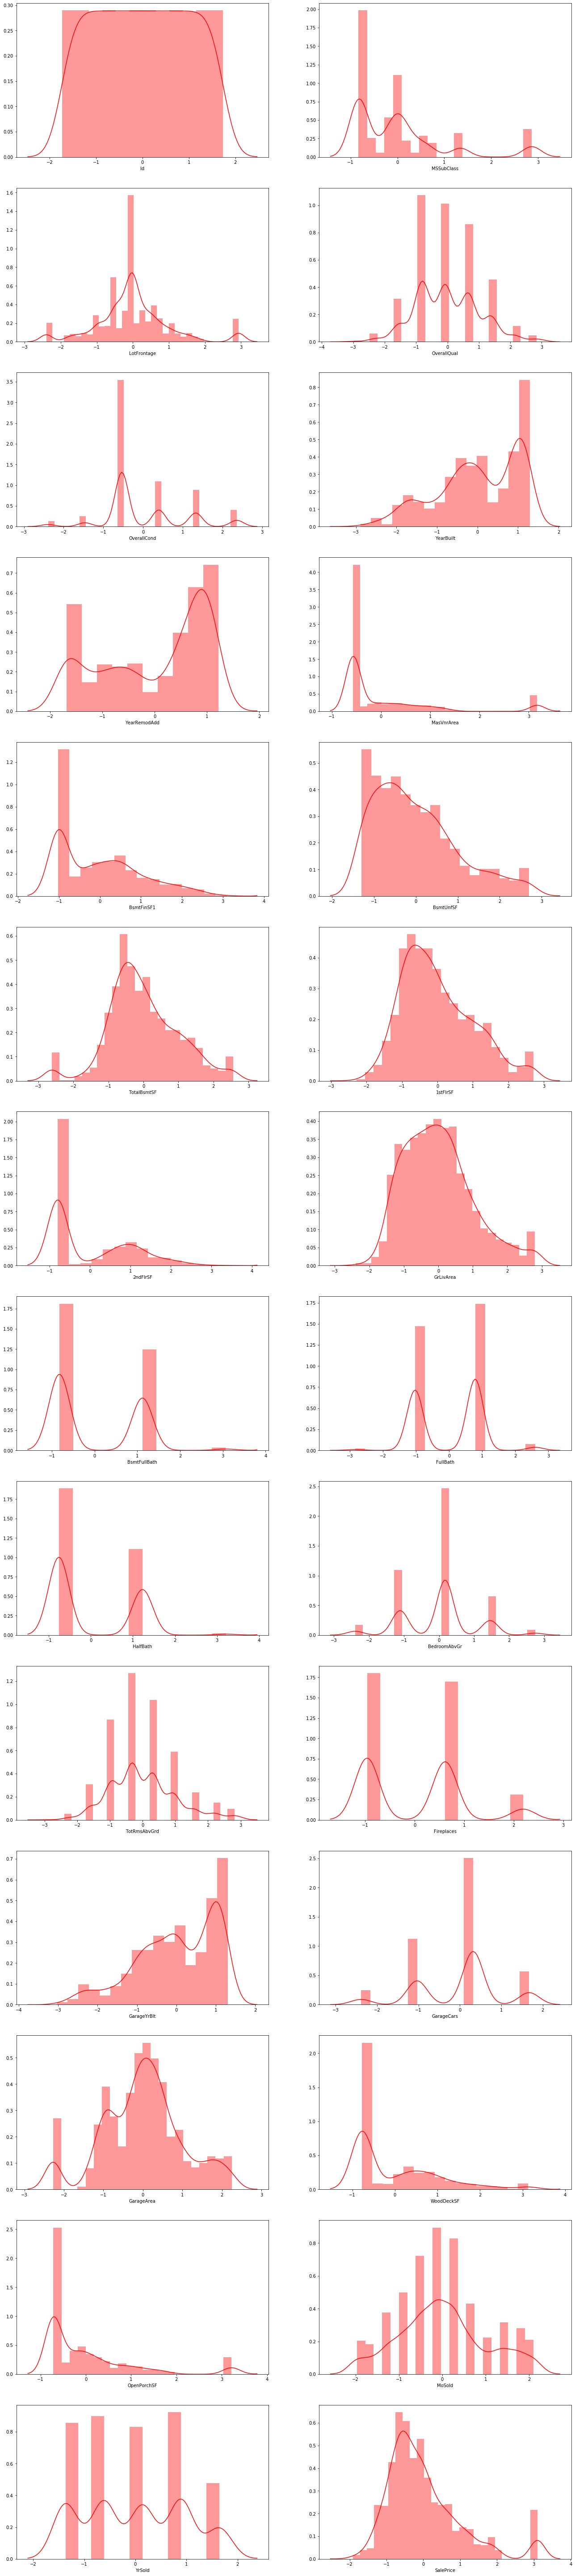

In [62]:
c = 1
plt.figure()
for i in num:
    plt.subplot(len(num)/2,2,c)
    sns.distplot(df_normal[i],color = 'r')
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [63]:
gv_pop = list()
for i in range(len(df)):
    if df['SalePrice'][i] > 200000:
        gv_pop.append(df['GrLivArea'][i])

In [64]:
len(gv_pop)

427

In [65]:
gv_pop_mn = np.mean(gv_pop)
gv_pop_mn

1965.3395784543325

In [66]:
gv_samp = random.sample(gv_pop,50)

In [67]:
gv_samp_mn = np.mean(gv_samp)
gv_samp_mn

1962.28

In [68]:
gv_samp_std = np.std(gv_samp)
gv_samp_std

343.29078286490596

In [69]:
z = (gv_samp_mn - gv_pop_mn)/gv_samp_std

In [70]:
print(z)

-0.008912498112530217


In [71]:
import scipy.stats as stats
p_value = stats.norm.sf(abs(z))*2

In [72]:
p_value

0.9928889494995172

In [73]:
corr = df.corr()
corr.to_csv('DataCorr.csv')